#Face Mask Detection
This notebook aims to create a Face Mask Detection model using a custom Convolutional Neural Network (CNN). The model classifies images into the following categories:

1. People wearing masks
2. People not wearing masks
3. People wearing masks but in an incorrect manner

The dataset used for training and testing is obtained from Kaggle, specifically the "Face Mask Detector (mask, not mask, incorrect mask)" dataset. The model is built using TensorFlow and Keras.

In [1]:
# Install the Kaggle library
!pip install kaggle

In [2]:
# Upload your Kaggle API key (kaggle.json) file
from google.colab import files
files.upload()

# Move the Kaggle API key to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d spandanpatnaik09/face-mask-detectormask-not-mask-incorrect-mask

# Unzip the downloaded dataset
!unzip face-mask-detectormask-not-mask-incorrect-mask.zip -d dataset

Saving kaggle.json to kaggle.json
 94% 178M/190M [00:00<00:00, 173MB/s]
100% 190M/190M [00:01<00:00, 191MB/s]
Archive:  face-mask-detectormask-not-mask-incorrect-mask.zip
  inflating: dataset/dataset/incorrect_mask/aug_1.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_10.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_100.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_101.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_102.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_103.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_104.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_105.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_106.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_107.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_108.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_11.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_110.jpg  
  inflating: dataset/dataset/incorrect_mask/aug_111.jpg  
  inflating: dataset/

## Loading Libraries


In [3]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

## Dataset

The dataset contains images of people in different scenarios related to wearing masks. It includes three classes: 'with_mask', 'without_mask', and 'incorrect_mask'. The dataset is split into train and test datasets in 80:20 ratio.

In [4]:
dir = "dataset/dataset"

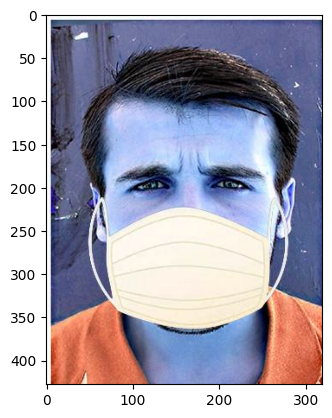

In [5]:
#Sample image
img = cv2.imread("dataset/dataset/with_mask/101-with-mask.jpg")
plt.imshow(img)
plt.show()

# Data Augmentation and ImageDataGenerators

To enhance the model's ability to generalize and improve its performance, data augmentation is applied to the training dataset. ImageDataGenerators from TensorFlow's Keras library are employed for this purpose. These generators create augmented images on-the-fly during model training.

## Data Augmentation Parameters

The following data augmentation techniques are applied to the training dataset:

- **Rescale**: Pixel values are rescaled to the range of [0, 1].
- **Rotation**: Random rotation of images by up to 20 degrees.
- **Width Shift**: Random horizontal shift of images by up to 20% of the total width.
- **Height Shift**: Random vertical shift of images by up to 20% of the total height.
- **Zoom**: Random zooming into images by up to 20%.
- **Horizontal Flip**: Randomly flip images horizontally.

Additionally, a small fraction (2%) of the training dataset is used for validation to monitor the model's performance during training.

## ImageDataGenerators

Two generators are created for the training and test datasets, respectively.

In [6]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.02
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.2
)

In [7]:
# Creating train data generators
train_data = train_gen.flow_from_directory(
    dir,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42,
    subset="training"
)

Found 2039 images belonging to 3 classes.


In [8]:
# Creating test data generators
test_data = test_gen.flow_from_directory(
    dir,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42,
    subset="validation"
)

Found 415 images belonging to 3 classes.


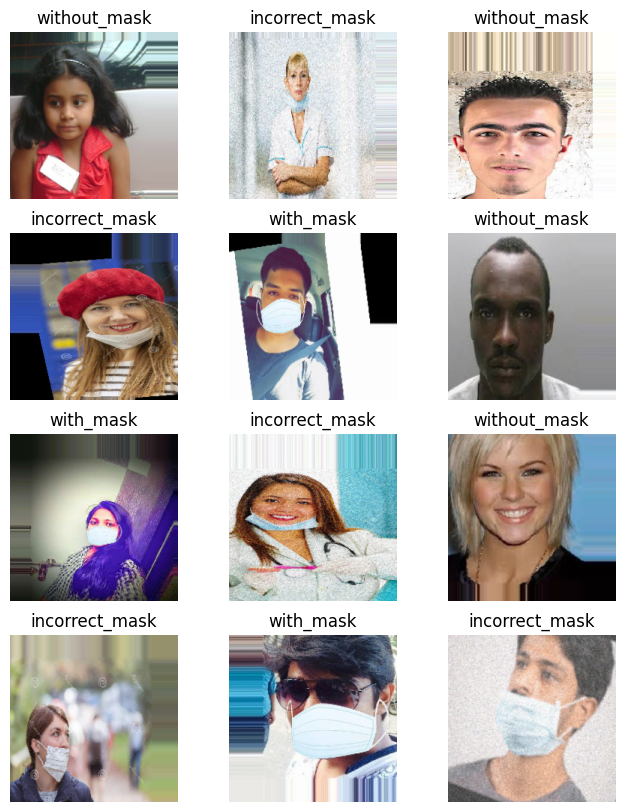

In [37]:
# Visualizing the train dataset
plt.figure(figsize=(8,10))
labels = list(train_data.class_indices.keys())
for i in range(12):
    image, label = train_data.next()
    plt.subplot(4,3,i+1)
    plt.imshow(image[i])
    plt.title(labels[tf.argmax(label[i])])
    plt.axis("off")

## Model Architecture
The Face Mask Detection model is constructed using a Sequential model from TensorFlow's Keras API. The CNN model architecture consists of several layers, each serving a specific purpose in the image classification task.

*   Convolutional Layers: Three convolutional layers with 64 filters and a kernel size of 2x2.
*   MaxPooling Layers: Three max-pooling layers with a pool size of 2x2.
*   Flatten Layer: Flattens the output from the convolutional layers into a one-dimensional array.
*   Dense Layers: Two dense layers with ReLU activation functions. The first dense layer consists of 128 neurons, providing a high-level representation of the learned features. The second dense layer, with 3 neurons and softmax activation, produces the final probability distribution for the three classes ('with_mask', 'without_mask', 'incorrect_mask').
*   Dropout Layer: Introduces dropout regularization with a rate of 0.5 to prevent overfitting during training.

In [16]:
model = tf.keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=2, activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=2, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=2, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.7),
    layers.Dense(3, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      16448     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 64)       

##Model Training
The model is compiled using :
*   Loss function : categorical crossentropy
*   Optimizer: Adam
*   Evaluation metric : Accuracy
*   Learning Rate :0.001
*   Epoch: 10


In [17]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [18]:
model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
64/64 [==============================] - 36s 538ms/step - loss: 1.0512 - accuracy: 0.4473 - val_loss: 0.8265 - val_accuracy: 0.7277
Epoch 2/10
64/64 [==============================] - 33s 513ms/step - loss: 0.8382 - accuracy: 0.6263 - val_loss: 0.5647 - val_accuracy: 0.8554
Epoch 3/10
64/64 [==============================] - 32s 508ms/step - loss: 0.7291 - accuracy: 0.7033 - val_loss: 0.4560 - val_accuracy: 0.8699
Epoch 4/10
64/64 [==============================] - 33s 512ms/step - loss: 0.6642 - accuracy: 0.7200 - val_loss: 0.3801 - val_accuracy: 0.8867
Epoch 5/10
64/64 [==============================] - 33s 509ms/step - loss: 0.6305 - accuracy: 0.7445 - val_loss: 0.3421 - val_accuracy: 0.8867
Epoch 6/10
64/64 [==============================] - 34s 530ms/step - loss: 0.5694 - accuracy: 0.7872 - val_loss: 0.3163 - val_accuracy: 0.8964
Epoch 7/10
64/64 [==============================] - 34s 528ms/step - loss: 0.5500 - accuracy: 0.7916 - val_loss: 0.2751 - val_accuracy: 0.8964

##Model Evaluation
The model's performance is evaluated on the test dataset, and accuracy metrics is used.

In [19]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

13/13 [==============================] - 2s 151ms/step - loss: 0.2400 - accuracy: 0.9012
Model Accuracy:  90.12 %


## Visualizing Model Predictions on Test Data
After training the Face Mask Detection model, we visualize its predictions on a subset of the test dataset.

1/1 [==============================] - 0s 33ms/step


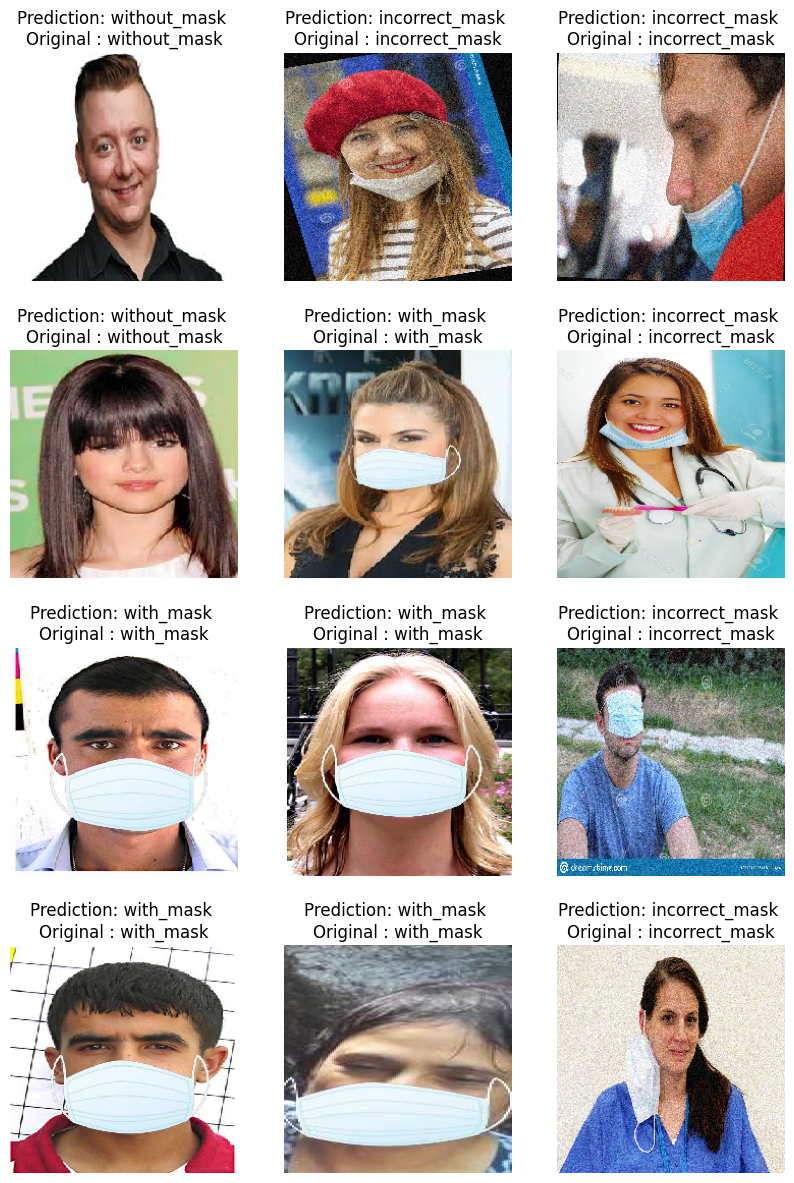

In [35]:
plt.figure(figsize=(10,10))
for i in range(12):
    image, label = test_data.next()
    model_pred = model.predict(image)
    plt.subplot(4, 3, i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
    plt.subplots_adjust(top=1.25)
    plt.axis("off")
plt.show()